# [Image Classification](https://www.tensorflow.org/tutorials/images/classification?hl=ja)

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # 学習用の猫画像のディレクトリ
train_dogs_dir = os.path.join(train_dir, 'dogs')  # 学習用の犬画像のディレクトリ
validation_cats_dir = os.path.join(validation_dir, 'cats')  # 検証用の猫画像のディレクトリ
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # 検証用の犬画像のディレクトリ


num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print(total_train)
print(total_val)

2000
1000


# Image preprocessing

In [20]:
# Define rescale method

def img_generator():
    return ImageDataGenerator(rescale=1./255., rotation_range=45, width_shift_range=.15,
                             height_shift_range=.15, horizontal_flip=True, zoom_range=0.5)

train_image_generator = img_generator()
test_image_generator  = ImageDataGenerator(rescale=1./255.)

## Don't forget to define "class_mode"!!! Default is "categorical"
## If isn't, accuracy score wont't be improved!!!
train_data_gen = train_image_generator.flow_from_directory(batch_size=512, directory=train_dir, shuffle=True, target_size=(150, 150), class_mode='binary')
test_data_gen  = test_image_generator.flow_from_directory(batch_size=512, directory=validation_dir, shuffle=True, target_size=(150,150), class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


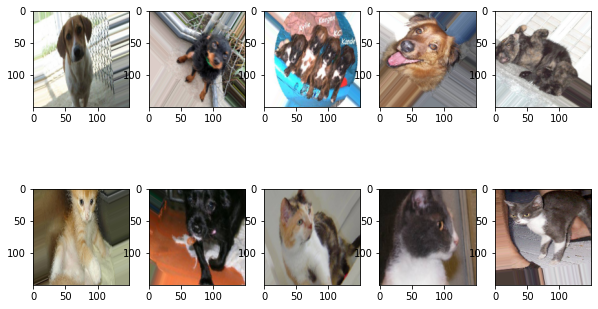

In [16]:
sample_training_images, _ = next(train_data_gen)
fig = plt.figure(figsize=(10,6))
for x in np.arange(0,10):
    fig.add_subplot(2,5,x+1)
    plt.imshow(sample_training_images[x])    

# Modeling

In [21]:
batch_size=128
epochs = 15

model = keras.Sequential()
model.add(keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(150, 150, 3)))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data_gen, epochs=15, batch_size=20, validation_data=test_data_gen)

Epoch 1/15
4/4 [==============================] - 23s 6s/step - loss: 0.6995 - accuracy: 0.5046 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 2/15
4/4 [==============================] - 19s 5s/step - loss: 0.6948 - accuracy: 0.5082 - val_loss: 0.6924 - val_accuracy: 0.5060
Epoch 3/15
4/4 [==============================] - 20s 5s/step - loss: 0.6979 - accuracy: 0.5044 - val_loss: 0.6909 - val_accuracy: 0.5350
Epoch 4/15
4/4 [==============================] - 19s 5s/step - loss: 0.6940 - accuracy: 0.5215 - val_loss: 0.6907 - val_accuracy: 0.4980
Epoch 5/15
4/4 [==============================] - 20s 5s/step - loss: 0.6929 - accuracy: 0.5109 - val_loss: 0.6900 - val_accuracy: 0.5150
Epoch 6/15
4/4 [==============================] - 19s 5s/step - loss: 0.6905 - accuracy: 0.5178 - val_loss: 0.6900 - val_accuracy: 0.5520
Epoch 7/15
4/4 [==============================] - 20s 5s/step - loss: 0.6930 - accuracy: 0.5204 - val_loss: 0.6894 - val_accuracy: 0.5110
Epoch 8/15
4/4 [==================